# Project Title : Food Delivery System 

# Purpose
The overall purpose of analyzing the food delivery system database is to gain comprehensive insights into user behavior, restaurant performance, menu item popularity, order trends, and delivery efficiency. This analysis helps in making data-driven decisions to enhance customer satisfaction, optimize restaurant offerings, streamline delivery operations, and improve the financial health of the food delivery business. By leveraging these insights, stakeholders can identify areas for improvement, implement strategic initiatives, and ultimately drive the growth and success of the food delivery platform.

# Step 0 : Downloading necessary packages

In [5]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

# Step 1 : Importing necessary packages

In [6]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

# Step 2 : Establishing the database connectivity from python to mysql database

In [7]:
# Establishing a connection to the MySQL database
connection = mysql.connector.connect(
user='root',                       # The username used to connect to the database
password='Rangegowda@9972',        # The password for the user 
host='localhost',                  # The host where the database server is located
database='food_delivery_system'    # The name of the database to connect to
)

# Step 3 : Data View

In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Query data from the 'Users' table
cursor.execute('SELECT * FROM Users')

#After fetching data from the database we are storing it into Pandas DataFrame
Users_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(Users_data.head())

   user_id           name              email   password  \
0        1       John Doe  user1@example.com  password1   
1        2     Jane Smith  user2@example.com  password2   
2        3  Alice Johnson  user3@example.com  password3   
3        4   Bob Williams  user4@example.com  password4   
4        5    Chris Brown  user5@example.com  password5   

                   address phone_number          created_at  \
0   123 Main St, Cityville     555-1001 2024-05-30 08:37:57   
1   456 Elm St, Townsville     555-1002 2024-05-30 08:37:57   
2  789 Oak St, Villagetown     555-1003 2024-05-30 08:37:57   
3  101 Pine St, Metropolis     555-1004 2024-05-30 08:37:57   
4     234 Maple St, Hamlet     555-1005 2024-05-30 08:37:57   

           updated_at  
0 2024-05-30 08:37:57  
1 2024-05-30 08:37:57  
2 2024-05-30 08:37:57  
3 2024-05-30 08:37:57  
4 2024-05-30 08:37:57  


In [9]:
# Query data from the 'Restaurants' table
cursor.execute('SELECT * FROM Restaurants')

#After fetching data from the database we are storing it into Pandas DataFrame
Restaurants_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(Restaurants_data.head())

   restaurant_id              name                  address phone_number  \
0              1       Pizza Place    789 Oak St, Cityville     555-2001   
1              2       Burger Barn  101 Pine St, Townsville     555-2002   
2              3        Salad Spot  456 Elm St, Villagetown     555-2003   
3              4  Sandwich Station  123 Main St, Metropolis     555-2004   
4              5       Sushi House  567 Maple St, Cityville     555-2005   

                     email rating          created_at          updated_at  
0  contact@restaurant1.com    4.5 2024-05-30 08:40:48 2024-05-30 08:40:48  
1  contact@restaurant2.com    4.2 2024-05-30 08:40:48 2024-05-30 08:40:48  
2  contact@restaurant3.com    4.7 2024-05-30 08:40:48 2024-05-30 08:40:48  
3  contact@restaurant4.com    4.3 2024-05-30 08:40:48 2024-05-30 08:40:48  
4  contact@restaurant5.com    4.6 2024-05-30 08:40:48 2024-05-30 08:40:48  


In [10]:
# Query data from the 'MenuItems' table
cursor.execute('SELECT * FROM MenuItems')

#After fetching data from the database we are storing it into Pandas DataFrame
MenuItems_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(MenuItems_data.head())

   item_id  restaurant_id               name  \
0      401              1   Margherita Pizza   
1      402              1    Pepperoni Pizza   
2      403              1  BBQ Chicken Pizza   
3      404              2     Classic Burger   
4      405              2       Cheeseburger   

                                   description  price category  availability  \
0              Classic cheese and tomato pizza  10.99    Pizza             1   
1                   Pepperoni and cheese pizza  12.99    Pizza             1   
2               BBQ sauce, chicken, and cheese  13.99    Pizza             1   
3  Beef patty with lettuce, tomato, and cheese   8.99  Burgers             1   
4  Beef patty with cheese, lettuce, and tomato   9.99  Burgers             1   

           created_at          updated_at  
0 2024-05-30 11:31:21 2024-05-30 11:31:21  
1 2024-05-30 11:31:21 2024-05-30 11:31:21  
2 2024-05-30 11:31:21 2024-05-30 11:31:21  
3 2024-05-30 11:31:21 2024-05-30 11:31:21  
4 2024-05-

In [11]:
# Query data from the 'Orders' table
cursor.execute('SELECT * FROM Orders')

#After fetching data from the database we are storing it into Pandas DataFrame
Orders_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(Orders_data.head())

   order_id  user_id  restaurant_id total_price      status  \
0       241        1              1       25.99     Pending   
1       242        2              2       36.49   Delivered   
2       243        3              3       18.99  Processing   
3       244        4              4       42.99   Delivered   
4       245        5              5       29.99   Completed   

           created_at          updated_at  
0 2024-05-30 11:42:25 2024-05-30 11:42:25  
1 2024-05-30 11:42:25 2024-05-30 11:42:25  
2 2024-05-30 11:42:25 2024-05-30 11:42:25  
3 2024-05-30 11:42:25 2024-05-30 11:42:25  
4 2024-05-30 11:42:25 2024-05-30 11:42:25  


In [12]:
# Query data from the 'OrderItems' table
cursor.execute('SELECT * FROM OrderItems')

#After fetching data from the database we are storing it into Pandas DataFrame
OrderItems_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(OrderItems_data.head())

   order_item_id  order_id  item_id  quantity  price          created_at  \
0              1       241      401         2  51.98 2024-05-30 11:54:35   
1              2       242      402         1  36.49 2024-05-30 11:54:35   
2              3       243      403         3  56.97 2024-05-30 11:54:35   
3              4       244      404         2  85.98 2024-05-30 11:54:35   
4              5       245      405         1  18.99 2024-05-30 11:54:35   

           updated_at  
0 2024-05-30 11:54:35  
1 2024-05-30 11:54:35  
2 2024-05-30 11:54:35  
3 2024-05-30 11:54:35  
4 2024-05-30 11:54:35  


In [13]:
# Query data from the 'DeliveryDetails' table
cursor.execute('SELECT * FROM DeliveryDetails')

#After fetching data from the database we are storing it into Pandas DataFrame
DeliveryDetails_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(DeliveryDetails_data.head())

   delivery_id  order_id             delivery_address       delivery_time  \
0            1       241   123 Main St, City, Country 2024-06-01 14:00:00   
1            2       242    456 Elm St, City, Country 2024-06-01 15:30:00   
2            3       243    789 Oak St, City, Country 2024-06-01 16:45:00   
3            4       244   321 Pine St, City, Country 2024-06-01 13:15:00   
4            5       245  654 Maple St, City, Country 2024-06-01 17:30:00   

    delivery_status          created_at          updated_at  
0  Out for Delivery 2024-05-30 12:17:12 2024-05-30 12:17:12  
1        In Transit 2024-05-30 12:17:12 2024-05-30 12:17:12  
2           Pending 2024-05-30 12:17:12 2024-05-30 12:17:12  
3         Delivered 2024-05-30 12:17:12 2024-05-30 12:17:12  
4  Out for Delivery 2024-05-30 12:17:12 2024-05-30 12:17:12  


## Step 4 : Data cleaning

In [14]:
# Drop rows with missing values from the Users_data DataFrame
Users_data.dropna()

,user_id,name,email,password,address,phone_number,created_at,updated_at
0,1,John Doe,user1@example.com,password1,"123 Main St, Cityville",555-1001,2024-05-30 08:37:57,2024-05-30 08:37:57
1,2,Jane Smith,user2@example.com,password2,"456 Elm St, Townsville",555-1002,2024-05-30 08:37:57,2024-05-30 08:37:57
2,3,Alice Johnson,user3@example.com,password3,"789 Oak St, Villagetown",555-1003,2024-05-30 08:37:57,2024-05-30 08:37:57
3,4,Bob Williams,user4@example.com,password4,"101 Pine St, Metropolis",555-1004,2024-05-30 08:37:57,2024-05-30 08:37:57
4,5,Chris Brown,user5@example.com,password5,"234 Maple St, Hamlet",555-1005,2024-05-30 08:37:57,2024-05-30 08:37:57
...,...,...,...,...,...,...,...,...
123,124,Harper Hill,harper.hill@example.com,password,551 Cedar St,555-2363,2024-05-30 11:08:15,2024-05-30 11:08:15
124,125,Liam Scott,liam.scott@example.com,password,662 Elm St,555-7909,2024-05-30 11:08:15,2024-05-30 11:08:15
125,126,Sophia Adams,sophia.adams@example.com,password,773 Oak St,555-2364,2024-05-30 11:08:15,2024-05-30 11:08:15
126,127,Oliver Mitchell,oliver.mitchell@example.com,password,884 Pine St,555-7910,2024-05-30 11:08:15,2024-05-30 11:08:15


In [15]:
# Check for duplicate rows in the Restaurants_data DataFrame
Restaurants_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
108    False
109    False
110    False
111    False
112    False
Length: 113, dtype: bool

In [16]:
# Retrieve the five rows with the smallest quantity values from the OrderItems_data DataFrame
OrderItems_data.nsmallest(5,'quantity')

,order_item_id,order_id,item_id,quantity,price,created_at,updated_at
1,2,242,402,1,36.49,2024-05-30 11:54:35,2024-05-30 11:54:35
4,5,245,405,1,18.99,2024-05-30 11:54:35,2024-05-30 11:54:35
5,6,246,406,1,16.49,2024-05-30 11:54:35,2024-05-30 11:54:35
7,8,248,408,1,21.99,2024-05-30 11:54:35,2024-05-30 11:54:35
8,9,249,409,1,29.99,2024-05-30 11:54:35,2024-05-30 11:54:35


In [17]:
# Retrieve the five rows with the largest quantity values from the OrderItems_data DataFrame
OrderItems_data.nlargest(5,'quantity')

,order_item_id,order_id,item_id,quantity,price,created_at,updated_at
2,3,243,403,3,56.97,2024-05-30 11:54:35,2024-05-30 11:54:35
10,11,251,411,3,137.97,2024-05-30 11:54:35,2024-05-30 11:54:35
19,20,260,420,3,92.97,2024-05-30 11:54:35,2024-05-30 11:54:35
30,31,271,431,3,95.97,2024-05-30 11:54:35,2024-05-30 11:54:35
39,40,280,440,3,113.97,2024-05-30 11:54:35,2024-05-30 11:54:35


In [18]:
# Filter DeliveryDetails_data DataFrame to include only rows with delivery status 'Delivered'
order_delivered_status = DeliveryDetails_data[DeliveryDetails_data['delivery_status']=='Delivered']

# Print the first five rows of the filtered DataFrame
print(order_delivered_status.head())

    delivery_id  order_id                 delivery_address  \
3             4       244       321 Pine St, City, Country   
7             8       248     369 Walnut St, City, Country   
11           12       252      258 Lemon St, City, Country   
15           16       256  963 Blueberry St, City, Country   
19           20       260       741 Pear St, City, Country   

         delivery_time delivery_status          created_at          updated_at  
3  2024-06-01 13:15:00       Delivered 2024-05-30 12:17:12 2024-05-30 12:17:12  
7  2024-06-01 10:00:00       Delivered 2024-05-30 12:17:12 2024-05-30 12:17:12  
11 2024-06-01 14:15:00       Delivered 2024-05-30 12:17:12 2024-05-30 12:17:12  
15 2024-06-01 13:00:00       Delivered 2024-05-30 12:17:12 2024-05-30 12:17:12  
19 2024-06-01 14:45:00       Delivered 2024-05-30 12:17:12 2024-05-30 12:17:12  


In [19]:
# Calculate the sum of missing values in each column of the MenuItems_data DataFrame
MenuItems_data.isnull().sum()

item_id          0
restaurant_id    0
name             0
description      0
price            0
category         0
availability     0
created_at       0
updated_at       0
dtype: int64

In [20]:
# Filter Orders_data DataFrame to include only rows with status 'Pending'
order_pending_status = Orders_data[Orders_data['status']=='Pending']

# Print the count of rows in the filtered DataFrame
print(order_pending_status.count())

order_id         23
user_id          23
restaurant_id    23
total_price      23
status           23
created_at       23
updated_at       23
dtype: int64


In [21]:
# Filter OrderItems_data DataFrame to include only rows with price greater than 70
order_price = OrderItems_data[OrderItems_data['price'] > 70]['price']

# Print the 'price' column of the filtered DataFrame
print(order_price)

3       85.98
6       77.98
10     137.97
16      73.98
19      92.97
24      76.98
29      71.98
30      95.97
39     113.97
43      71.98
44      78.98
49     110.97
56      85.98
59     107.97
66      83.98
69     110.97
76      85.98
79     107.97
86      83.98
89     110.97
96      85.98
99     107.97
106     83.98
109    110.97
Name: price, dtype: object


In [22]:
# Sort Restaurants_data DataFrame by 'rating' column in descending order
Restaurants_data.sort_values('rating',ascending=False)

,restaurant_id,name,address,phone_number,email,rating,created_at,updated_at
99,100,Pizza Paradise,"8686 Pizza Rd, Pizzaville",901-234-5676,contact@pizzaparadise.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
63,64,BBQ Bliss,"5050 BBQ Blvd, BBQ City",345-678-9017,contact@bbqbliss.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
26,27,Thai Kitchen,"1313 Thai Blvd, Thaicity",678-901-2346,hello@thaikitchen.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
92,93,Dessert Dreams,"7979 Dessert Ln, Dessert City",234-567-8909,info@dessertdreams.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
74,75,Thai Treats,"6161 Thai Blvd, Thaicity",456-789-0129,hello@thaitreats.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
...,...,...,...,...,...,...,...,...
88,89,Salad Shack,"7575 Salad Ln, Salad City",890-123-4574,info@saladshack.com,4.3,2024-05-30 11:20:35,2024-05-30 11:20:35
12,13,Burger Haven,"456 Burger Ave, Burgerville",234-567-8901,info@burgerhaven.com,4.2,2024-05-30 11:20:35,2024-05-30 11:20:35
1,2,Burger Barn,"101 Pine St, Townsville",555-2002,contact@restaurant2.com,4.2,2024-05-30 08:40:48,2024-05-30 08:40:48
28,29,Lebanese Cafe,"1515 Lebanese Ln, Lebanese City",890-123-4568,info@lebanesecafe.com,4.2,2024-05-30 11:20:35,2024-05-30 11:20:35


In [23]:
# Sort Restaurants_data DataFrame by 'rating' column in ascending order
Restaurants_data.sort_values('rating',ascending=True)

,restaurant_id,name,address,phone_number,email,rating,created_at,updated_at
15,16,Chicken Corner,"202 Chicken Rd, Chickenville",567-890-1234,contact@chickencorner.com,4.1,2024-05-30 11:20:35,2024-05-30 11:20:35
1,2,Burger Barn,"101 Pine St, Townsville",555-2002,contact@restaurant2.com,4.2,2024-05-30 08:40:48,2024-05-30 08:40:48
28,29,Lebanese Cafe,"1515 Lebanese Ln, Lebanese City",890-123-4568,info@lebanesecafe.com,4.2,2024-05-30 11:20:35,2024-05-30 11:20:35
12,13,Burger Haven,"456 Burger Ave, Burgerville",234-567-8901,info@burgerhaven.com,4.2,2024-05-30 11:20:35,2024-05-30 11:20:35
88,89,Salad Shack,"7575 Salad Ln, Salad City",890-123-4574,info@saladshack.com,4.3,2024-05-30 11:20:35,2024-05-30 11:20:35
...,...,...,...,...,...,...,...,...
108,109,BBQ Brilliance,"9595 BBQ Blvd, BBQ City",890-123-4576,info@bbqbrilliance.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
58,59,Dim Sum Corner,"4545 Dim Sum Blvd, Dim Sum City",890-123-4571,hello@dimsumcorner.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
92,93,Dessert Dreams,"7979 Dessert Ln, Dessert City",234-567-8909,info@dessertdreams.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35
47,48,Dessert Delights,"3434 Dessert Blvd, Dessert City",789-012-3459,contact@dessertdelights.com,4.8,2024-05-30 11:20:35,2024-05-30 11:20:35


In [24]:
# Calculate the number of duplicated rows in the Users_data DataFrame
Users_data.duplicated().sum()

0

## Step 5 : Data Visualization

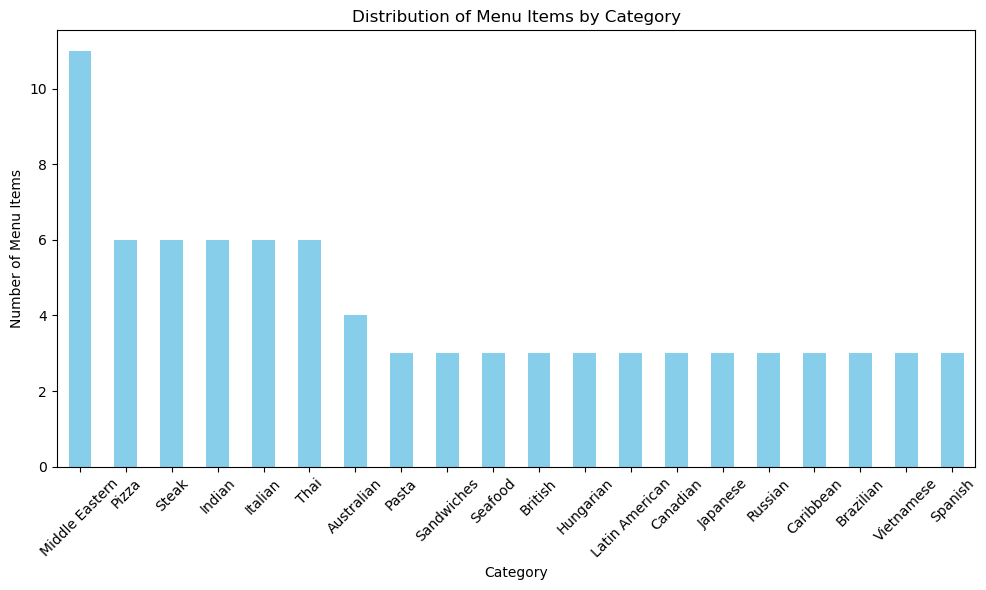

In [25]:
# Group the menu items by category and count the number of items in each category
category_counts = MenuItems_data['category'].value_counts().head(20)

# Plot a bar chart to visualize the distribution of menu items by category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

# Add labels and title to the plot
plt.xlabel('Category')
plt.ylabel('Number of Menu Items')
plt.title('Distribution of Menu Items by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

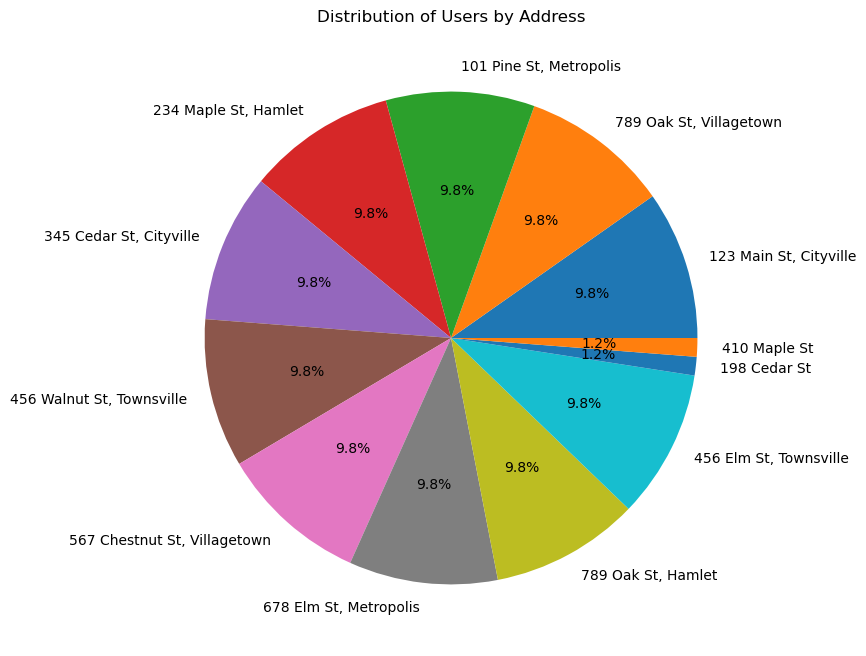

In [26]:
# Create a pie chart to visualize the distribution of users by address
plt.figure(figsize=(8, 8))

# Count the number of users for each address and plot the top 12 addresses
Users_data['address'].value_counts().head(12).plot(kind='pie', autopct='%1.1f%%')

# Add title and remove y-label for better presentation
plt.title('Distribution of Users by Address')
plt.ylabel('')

# Display the pie chart
plt.show()

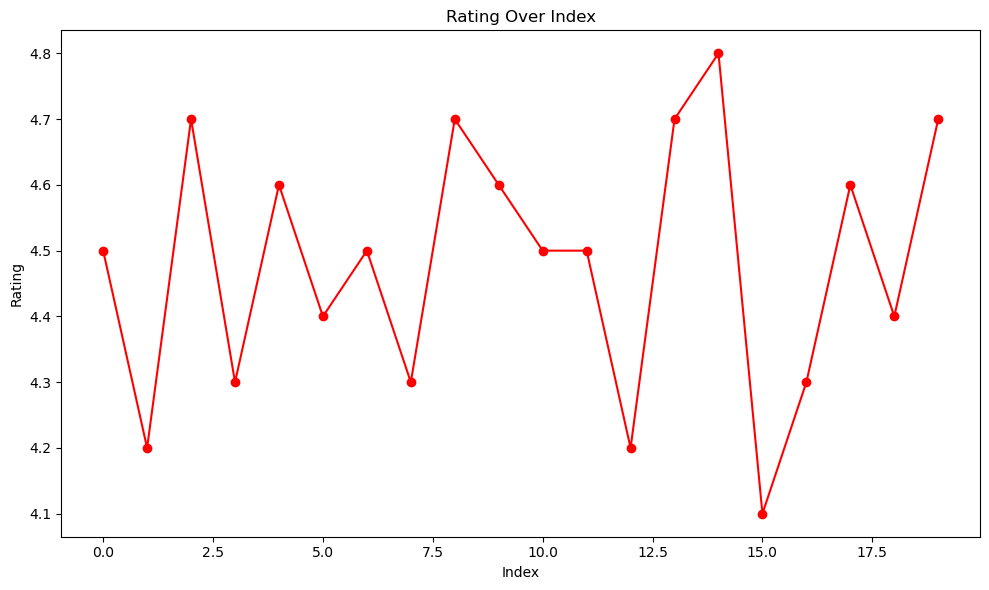

In [27]:
# Create a DataFrame containing the first 20 rows of the original data
df = pd.DataFrame(Restaurants_data.head(20))

# Create a numerical index for the DataFrame
df.reset_index(drop=True, inplace=True)

# Plot the line chart
plt.figure(figsize=(10, 6))

# Plotting rating over index
plt.plot(df.index, df['rating'], marker='o', color='Red')

# Setting the title of the plot
plt.title('Rating Over Index')

# Labeling the x-axis
plt.xlabel('Index')

# Labeling the y-axis
plt.ylabel('Rating')

# Displaying the plot
plt.tight_layout()
plt.show()

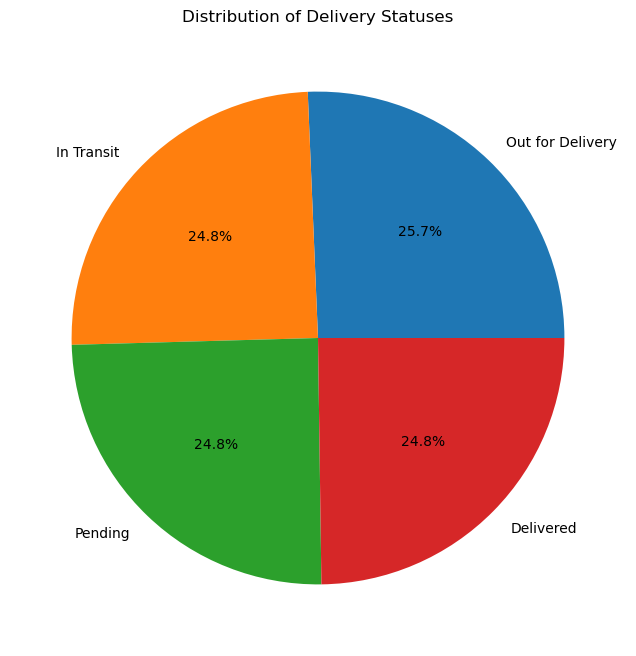

In [29]:
# Create a pie chart to visualize the distribution of delivery statuses
plt.figure(figsize=(8, 8))

# Count the number of occurrences for each delivery status and plot the distribution
DeliveryDetails_data['delivery_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Add title and remove y-label for better presentation
plt.title('Distribution of Delivery Statuses')
plt.ylabel('')

# Display the pie chart
plt.show()


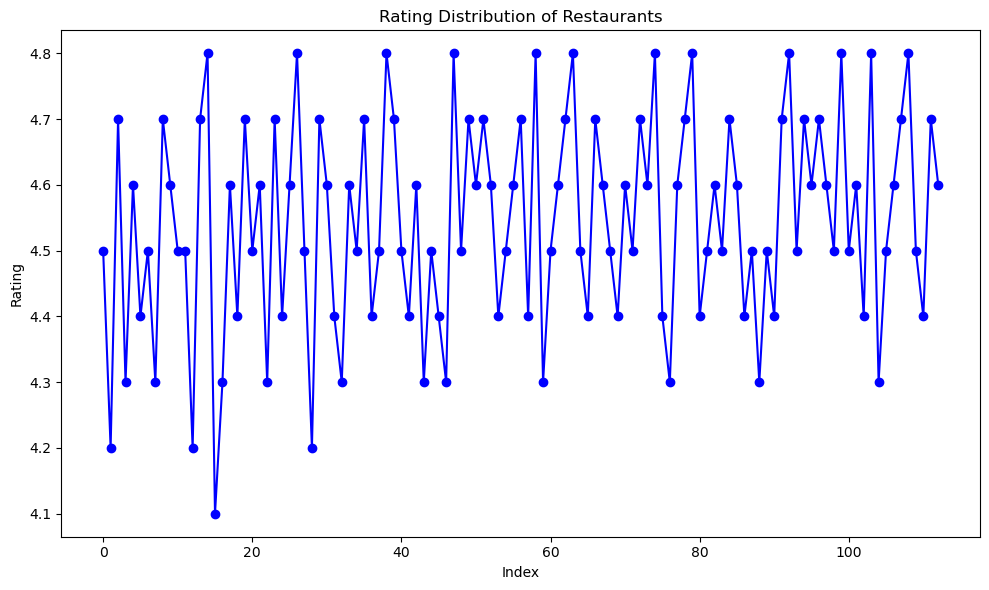

In [30]:
# Plot the rating distribution of all restaurants
plt.figure(figsize=(10, 6))

# Plot the ratings against the index of restaurants
plt.plot(Restaurants_data.index, Restaurants_data['rating'], marker='o',  color='blue')

# Add title and labels to the plot
plt.title('Rating Distribution of Restaurants')
plt.xlabel('Index')
plt.ylabel('Rating')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


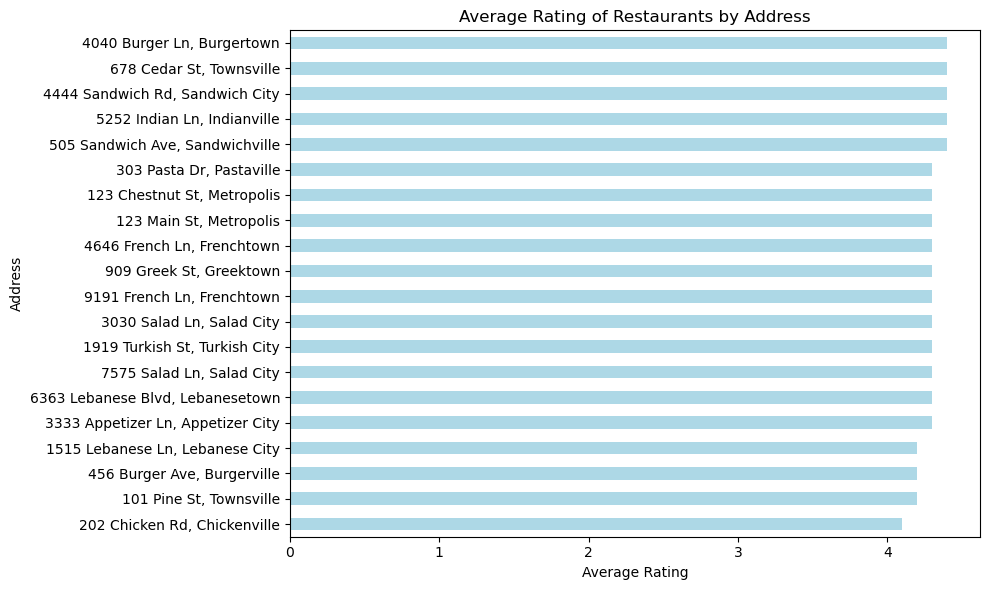

In [31]:
# Calculate the average rating of restaurants by address
avg_rating_by_address = Restaurants_data.groupby('address')['rating'].mean().sort_values().head(20)

# Create a horizontal bar chart to visualize the average rating of restaurants by address
plt.figure(figsize=(10, 6))
avg_rating_by_address.plot(kind='barh', color='lightblue')

# Add labels and title to the plot
plt.xlabel('Average Rating')
plt.ylabel('Address')
plt.title('Average Rating of Restaurants by Address')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


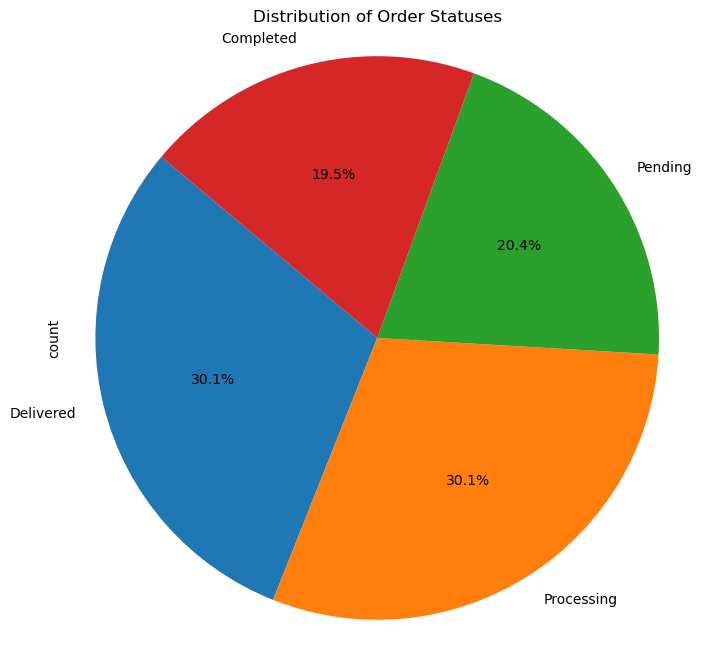

In [32]:
# Calculate the distribution of order statuses
order_status_distribution = Orders_data['status'].value_counts()

# Create a pie chart to visualize the distribution of order statuses
plt.figure(figsize=(8, 8))
order_status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Add title and ensure equal aspect ratio for better presentation
plt.title('Distribution of Order Statuses')
plt.axis('equal')

# Display the pie chart
plt.show()


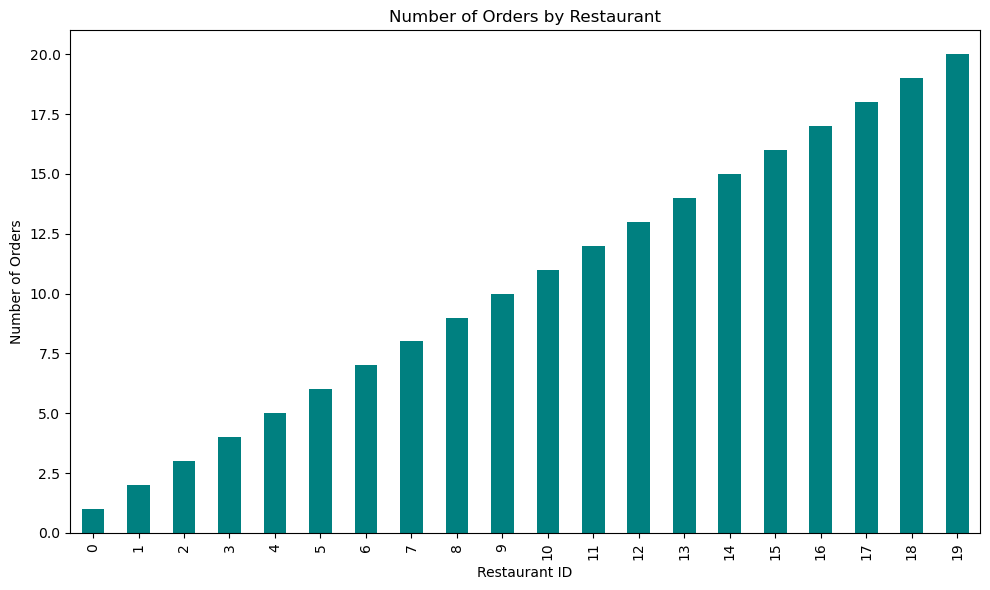

In [33]:
# Extract the number of orders by restaurant_id
orders_by_restaurant = Orders_data['restaurant_id'].head(20)

# Create a bar chart to visualize the number of orders by restaurant
plt.figure(figsize=(10, 6))
orders_by_restaurant.plot(kind='bar', color='teal')

# Add labels and title to the plot
plt.xlabel('Restaurant ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Restaurant')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


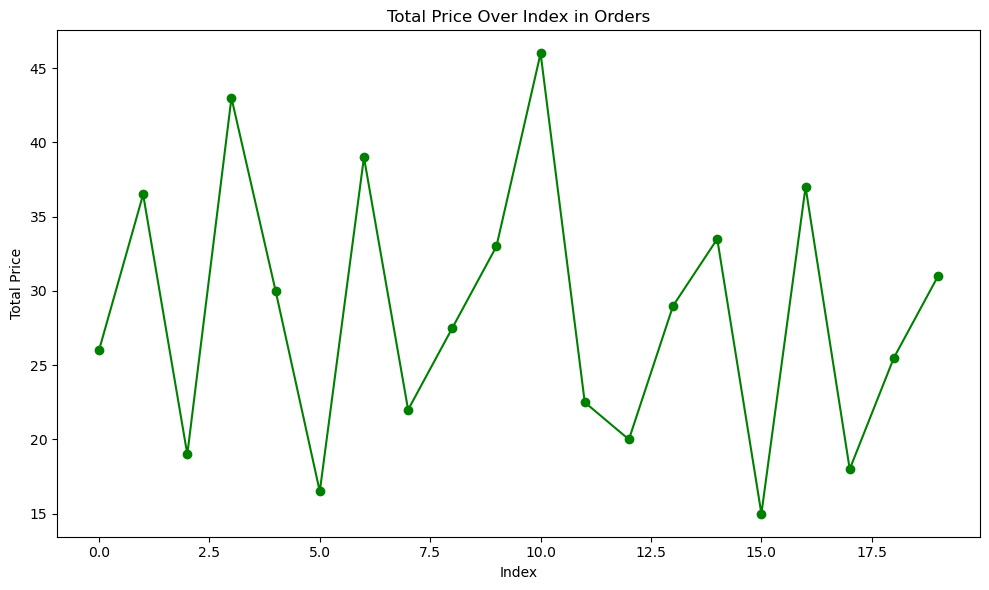

In [36]:
# Create a DataFrame containing the first 20 rows of the Orders data
df_orders = pd.DataFrame(Orders_data.head(20))

# Create a numerical index for the DataFrame
df_orders.reset_index(drop=True, inplace=True)

# Plot the line chart for total price
plt.figure(figsize=(10, 6))
plt.plot(df_orders.index, df_orders['total_price'], marker='o', color='Green')

# Add title and labels to the plot
plt.title('Total Price Over Index in Orders')
plt.xlabel('Index')
plt.ylabel('Total Price')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


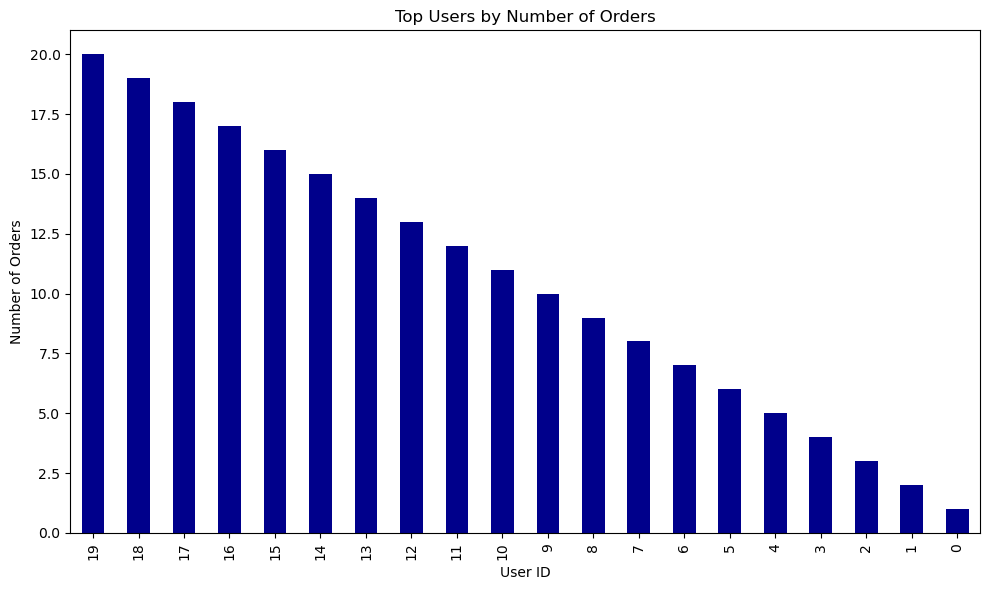

In [60]:
# Calculate the number of orders for each user and extract the top 20 users
top_users = Orders_data['user_id'].head(20).sort_index(ascending=False)

# Create a bar chart to visualize the number of orders for top users in reversed order
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='darkblue')

# Add labels and title to the plot
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.title('Top Users by Number of Orders')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

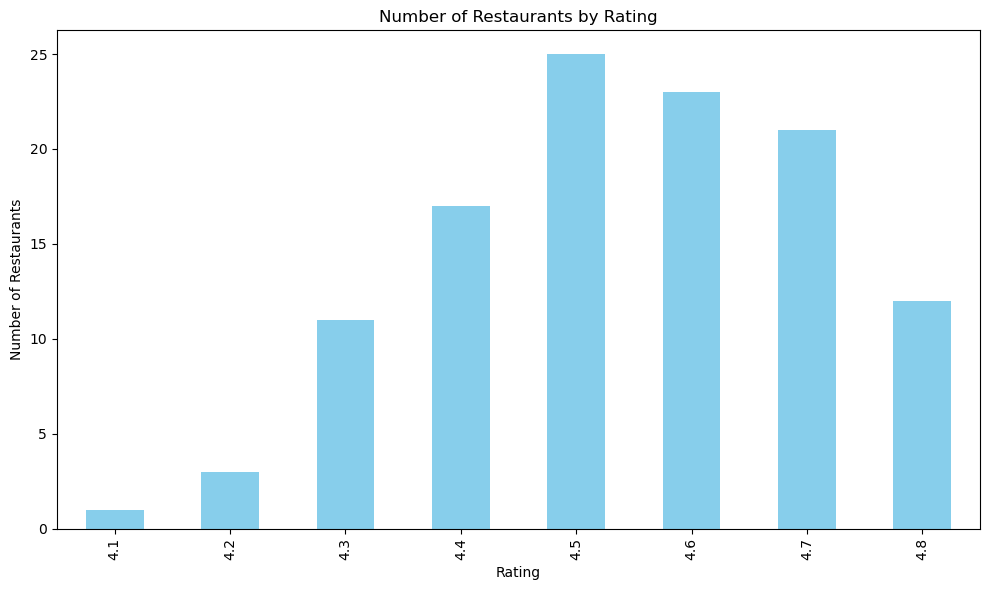

In [38]:
# Calculate the number of restaurants for each rating and sort by rating
rating_counts = Restaurants_data['rating'].value_counts().sort_index()

# Create a bar plot to visualize the number of restaurants by rating
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Add title and labels to the plot
plt.title('Number of Restaurants by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


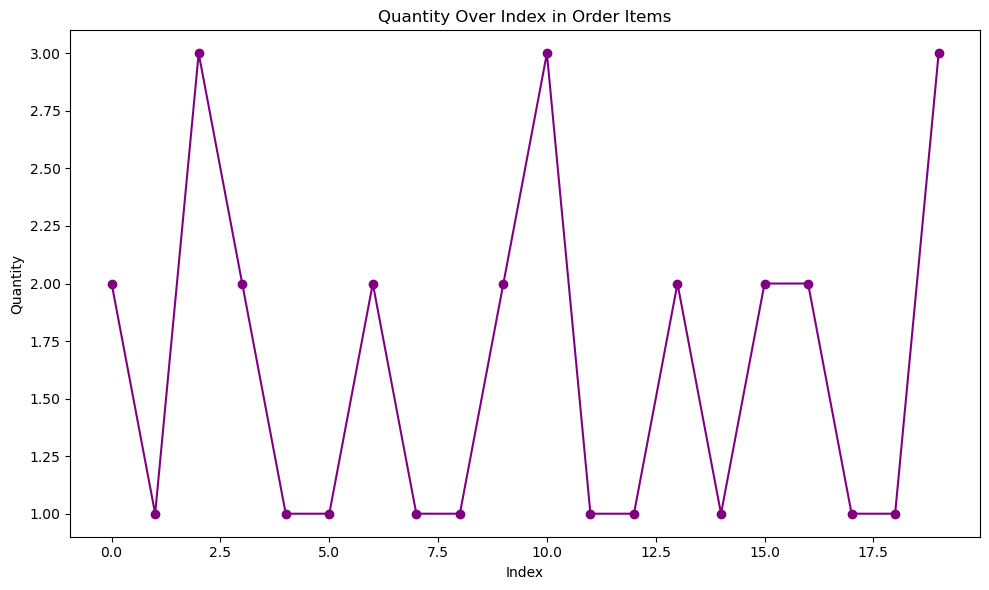

In [39]:
# Create a DataFrame containing the first 20 rows of the Order Items data
df_order_items = pd.DataFrame(OrderItems_data.head(20))

# Create a numerical index for the DataFrame
df_order_items.reset_index(drop=True, inplace=True)

# Plot the line chart for quantity
plt.figure(figsize=(10, 6))
plt.plot(df_order_items.index, df_order_items['quantity'], marker='o', color='Purple')

# Add title and labels to the plot
plt.title('Quantity Over Index in Order Items')
plt.xlabel('Index')
plt.ylabel('Quantity')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Conclusions
These plots and their analyses provide a comprehensive understanding of different aspects of the food delivery system, such as restaurant quality, pricing strategies, customer preferences, operational efficiency, and business trends.